In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Dámatábla

Hozzuk létre a  `create_checkers_board(board_size)` függvényt, ami egy  `board_size x board_size` méretű táblát hoz létre, ahol a sorok és oszlopok mentén 1-esek és 0-sok váltakoznak. Az első elem legyen 0.  Board size alapértéke legyen 8.

## Pythonos megoldás

In [ ]:
def create_checkers_board_python(board_size=8):
    board = []

    for i in range(0, board_size):
        board.append([])
        for j in range(0, board_size):
            if (i+j) % 2 == 1:
                board[i].append(1)
            else:
                board[i].append(0)

    return board

create_checkers_board_python()

[[0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 0, 1, 0, 1, 0, 1, 0]]

## Numpy megoldás

In [ ]:
def create_checkers_board_numpy1(board_size=8):
    board = np.zeros((board_size, board_size), dtype=np.uint8)

    board[::2, 1::2] = 1
    board[1::2, ::2] = 1

    return board

create_checkers_board_numpy1()

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]], dtype=uint8)

In [ ]:
def create_checkers_board_numpy2(board_size=8):
    indices = np.indices((board_size,board_size))
    return indices.sum(axis=0) % 2

create_checkers_board_numpy2()

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

## Futásiidő összehasonlítás

In [ ]:
import time

def time_fun(fun, *args, **kwargs): 
    start = time.time()
    fun(*args, **kwargs)
    end = time.time()
    return end - start

In [ ]:
board_sizes = [8, 100, 1000, 2000, 5000]

python_runtimes = [time_fun(create_checkers_board_python, board_size = size) for size in board_sizes]
numpy1_runtimes = [time_fun(create_checkers_board_numpy1, board_size = size) for size in board_sizes]
numpy2_runtimes = [time_fun(create_checkers_board_numpy2, board_size = size) for size in board_sizes]

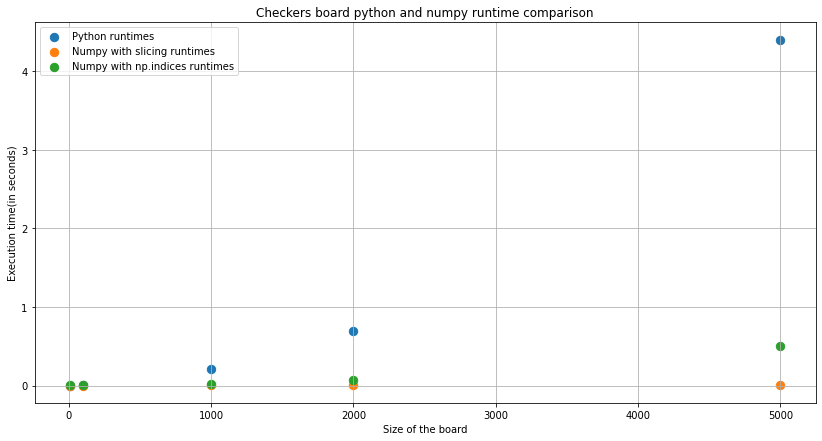

In [ ]:
plt.figure(figsize=(14, 7))
plt.title("Checkers board python and numpy runtime comparison")
plt.xlabel("Size of the board")
plt.ylabel("Execution time(in seconds)")
plt.scatter(board_sizes, python_runtimes, s=70)
plt.scatter(board_sizes, numpy1_runtimes, s=70)
plt.scatter(board_sizes, numpy2_runtimes, s=70)
plt.legend(["Python runtimes", "Numpy with slicing runtimes", "Numpy with np.indices runtimes"])
plt.grid()
plt.show()

# Centroidok

Van N centroid pontunk, ami sportolók csoportjainak felel meg(pl: kosárlabdázó, tornász, NFL falember,...). A pontok 2 dimenziósak, az első koordináta a magasságot, a második a súlyt jelzi. Hozzunk létre egy függvényt, amely eldönti egy paraméterül kapott sporotlóról, hogy melyik csoportba tartozik, azaz hogy melyik centroidhoz van a legközelebb(euklidészi távolsággal). Adja vissza a csoport indexét. A függvény paramétere egy tuple.

In [ ]:
centroids = np.array([[162, 50], # tornász
                       [190, 150], # NFL falember
                       [200, 105], # kosaras
                       [168, 62], # maratonfutó
                       [175, 160]]) # szumós 
unknown_point = (180, 90)

## Pythonos megoldás

In [ ]:
import math

def get_group_python(x):
    euclidean_dists = []
    for c in centroids:
        squared_dist = [(c[i] - x[i])**2 for i in range(len(c))]
        current_dist = math.sqrt(sum(squared_dist))
        euclidean_dists.append(current_dist)

    mindist = min(euclidean_dists)
    return euclidean_dists.index(mindist)

get_group_python(unknown_point)

2

## Numpy megoldás

In [ ]:
def get_group_numpy(x):
    x = np.array(x)
    squared_dists = np.power(centroids - x, 2)
    sum_of_suqared_dists = np.sum(squared_dists, axis=1)
    euclidean_dists = np.sqrt(sum_of_suqared_dists)
    return np.argmin(euclidean_dists)

get_group_numpy(unknown_point)

2

## Futásiidő összehasonlítás

In [ ]:
time_fun(get_group_python, unknown_point), time_fun(get_group_numpy, unknown_point)

(0.00011897087097167969, 0.0001227855682373047)

In [ ]:
centroids = np.random.random((5000,2))
time_fun(get_group_python, unknown_point), time_fun(get_group_numpy, unknown_point)

(0.0223391056060791, 0.0004131793975830078)

# Titanic túlélők

Hozzuk létre a `get_titanic_survivors_matching_cond()` függvényt, ami megadja a Titanic utasai közül azoknak a neveit, akik nem első osztályon utaztak, 30 évnél idősebbek és túlélték a katasztrófát.

In [ ]:
travel_classes = np.array([3,3,3,1,3,3,1,3,3,2])
ages = np.array([22,31,26,35,35,50,54,2,27,55])
survived = np.array([False, True, True, True, False, False, False, 
                     False, False, True])
names = np.array(["Braund, Mr. Owen Harris", "Goldsmith, Mrs. Frank John ", "Heikkinen, Miss. Laina",
         "Futrelle, Mrs. Jacques Heath", "Allen, Mr. William Henry", "Moran, Mr. James",
         "McCarthy, Mr. Timothy J", "Palsson, Master. Gosta Leonard", 
         "Johnson, Mrs. Oscar W", "Hewlett, Mrs."])

## Python megoldás

In [ ]:
def get_titanic_survivors_matching_cond_python():
    matching_cond = list() # []
    for ind, name in enumerate(names):
        if travel_classes[ind] != 1 and ages[ind] > 30 and survived[ind]:
            matching_cond.append(name)

    return matching_cond

get_titanic_survivors_matching_cond_python()

['Goldsmith, Mrs. Frank John ', 'Hewlett, Mrs.']

## Numpy megoldás

In [ ]:
def get_titanic_survivors_matching_cond_numpy():
    older_than_30_mask = ages > 30
    not_first_class_mask = travel_classes !=1

    return names[older_than_30_mask & not_first_class_mask & survived]

get_titanic_survivors_matching_cond_numpy()

array(['Goldsmith, Mrs. Frank John ', 'Hewlett, Mrs.'], dtype='<U30')

In [ ]:
time_fun(get_titanic_survivors_matching_cond_python), time_fun(get_titanic_survivors_matching_cond_numpy)

(4.0531158447265625e-05, 4.9591064453125e-05)

# Kétosztályú accuracy
Hozzuk létre az `accuracy(true_labels, predictions)` függvényt, amely két numpy tömböt kap paraméterül. Az első tömb a helyes osztálycimkéket, a második pedig a becsült osztálycímkéket jelöli. Az accuracy képlete:

$$ Accuracy = \dfrac{VP + VN}{VP+VN+FP+FN} $$

ahol VP a valós pozitívok(azaz ahol az adot kategóriát helyesen választottuk),
VN a valós negatívok(azaz ahol az adot kategóriát helyesen nem választottuk) száma, FP a fals pozitívok száma(azaz ahol az adott kategóriát választottuk, de nem az volt a helyes), FN pedig a fals negatívok száma(azaz ahol nem az adott kategóriát választottuk, de az volt a helyes).


In [ ]:
true_labels = survived.astype("int")
predictions = np.array([0,1,1,0,1,1,1,0,0,1])

## Pythonos megoldás

In [ ]:
def accuracy_python(true_labels, predictions):
    good_prediction_count = 0

    for idx in range(0, len(predictions)):
        if true_labels[idx] == predictions[idx]:
            good_prediction_count += 1

    return good_prediction_count / len(predictions)

accuracy_python(true_labels, predictions)

0.6

## Numpy megoldás

In [ ]:
def accuracy_numpy(true_labels, predictions):
    return np.sum(true_labels == predictions) / len(predictions)

accuracy_numpy(true_labels, predictions)

0.6

## Futásiidő összehasonlítás

In [ ]:
time_fun(accuracy_python, true_labels, predictions), time_fun(accuracy_numpy, true_labels, predictions)

(1.71661376953125e-05, 5.7220458984375e-05)

# Átlaghőmérsékletek

Egy fájlban meg vannak adva Jeruzsálem napi átlaghőmérsékletei 2012 és 2017 között óránként, kelvinben.

Először konvertáljuk át  a hőmérsékleteket celsiusra, az alábbi formula alapján: 

$$ ^{\circ}C = K - 273.15  $$

Majd hozzuk létre a `get_average_temp_for_each_weekday()` függvényt, amely visszaadja, hogy a hét egyes napjain mennyi az átlaghőmérséklet, egy 7 hosszú tömbben.

Továbbá hozzuk létre a `get_average_at(day, hour)` függvényt, amelynek két paramétere van:
* `day` a hét napjaira utal, egész szám 0-tól 7-ig. 0 felel meg hétfőnek, és így tovább
* `hour` az órára utal, egész szám 0-tól 23-ig

A függvény adja vissza az adott nap adott órájában vett átlaghőmérsékletet.


In [ ]:
from google.colab import files
import pandas as pd
#uploaded = files.upload()

import io
temperature_df = pd.read_csv(io.BytesIO(uploaded['temperature.csv']))
jerusalem_temperatures = temperature_df.loc[:, "Jerusalem"].dropna().values
jerusalem_temperatures = jerusalem_temperatures[11:-97]

## Megoldás

In [ ]:
jerusalem_temperatures_celsius = jerusalem_temperatures - 273.15

(44352,)

In [ ]:
def get_average_temp_for_each_weekday():
    weekly_temps = jerusalem_temperatures_celsius.reshape((-1, 7, 24))
    return np.mean(weekly_temps, axis=(0,2))

get_average_temp_for_each_weekday()

array([20.10622013, 20.11419856, 19.98141335, 19.92538797, 20.07691221,
       19.9933522 , 19.98492466])

In [ ]:
def get_average_at(day, hour):
    weekly_temps = jerusalem_temperatures_celsius.reshape((-1, 7, 24))
    weekly_temps_by_hour = np.mean(weekly_temps, axis=0)
    return weekly_temps_by_hour[day, hour]

get_average_at(0,12), get_average_at(3, 3)

(23.952066713674277, 16.48193657432199)

# Gyakori kecskepopulációk

Van egy kétdimenziós tömbünk, ami magassági szinteket tárol. Egy másik, hasonló alakú tömbben az adott területen élő kecskepopuláció faja van eltárolva, egész számként kódolva. Hozzuk létre a `largest_same_height_population()` függvényt, amely megadja, annak a kecskefajnak az azonosítóját, amelynek az egy magassági szinten belül a legtöbb populációja van, valamint a szóban forgó magassági szintet (A visszatérési érték így egy int és egy float szám). Ha több ilyen populáció van, akkor elég az egyikhez tartozó (azonosító, magassági szint) párt visszaadni.

In [ ]:
height_map = np.array([[2000., 3000., 4000.], [2000., 3000., 4000.], [4000.,3000.,2000.]])
species_map = np.array([[3, 1, 1], [3, 1, 0], [0, 1, 2]])
print(height_map)
print(species_map)

[[2000. 3000. 4000.]
 [2000. 3000. 4000.]
 [4000. 3000. 2000.]]
[[3 1 1]
 [3 1 0]
 [0 1 2]]


## Numpy megoldás

In [ ]:
def get_largest_same_height_population():
    pairs = np.stack([species_map.flatten(), height_map.reshape(-1)], axis=1)
    uniques, counts = np.unique(pairs, return_counts=True, axis=0)
    max_ind = np.argmax(counts)
    return tuple(uniques[max_ind])

get_largest_same_height_population()

(1.0, 3000.0)

In [ ]:
a = np.arange(8)
b = np.arange(5)

a[:, None] * b[np.newaxis, :]

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16],
       [ 0,  5, 10, 15, 20],
       [ 0,  6, 12, 18, 24],
       [ 0,  7, 14, 21, 28]])

In [ ]:
def get_largest_same_height_population2():
    unique_species = np.unique(species_map)
    unique_heights = np.unique(height_map)
    populations_per_height = np.where(height_map[:,:, None] == unique_heights, species_map[..., None], -1) # size_x, size_y, n_u_heights
    species_per_height = populations_per_height[..., np.newaxis] == unique_species # size_x, size_y, n_u_heights, n_u_species
    map_uhs = np.count_nonzero(species_per_height, axis=(0,1))
    i, j = np.unravel_index(np.argmax(map_uhs), map_uhs.shape)
    return unique_heights[i], unique_species[j]

get_largest_same_height_population2()

(3000.0, 1)

In [ ]:
time_fun(get_largest_same_height_population),  time_fun(get_largest_same_height_population2)

(0.00047206878662109375, 0.0005252361297607422)